In [16]:
import numpy as np
import pandas as pd

%matplotlib inline

# Returns

- Return: $$R_{t, t+1} = \frac{P_{t+1} - P_t}{P_t}$$
- Or, in the "+1" format: $$R_{t, t+1} = \frac{P_{t+1}}{P_t}$$
  - These are easier to compound, just multiply them
- You should think of "-20%" and "0.8" as identical
- For the *total* return, add in the dividends: $$R_{t, t+1} = \frac{P_{t+1} + D_{t,t+1} - P_t}{P_t}$$
- **Annualizing** a monthly return of 1%: $$1.01^{12} - 1 = 12.68\%$$

In [2]:
prices = pd.DataFrame({
    "BLUE": [8.70, 8.91, 8.71, 8.43, 8.73],
    "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]
})

In [3]:
prices.iloc[1:]

,BLUE,ORANGE
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [4]:
# This doesn't work because pandas considers the row index!
prices.iloc[1:] / prices.iloc[:-1]

,BLUE,ORANGE
0,NaN,NaN
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,NaN,NaN


In [5]:
# Use .values just once to keep the result a DF
prices.iloc[1:].values / prices.iloc[:-1] - 1

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


In [6]:
prices / prices.shift(1) - 1

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [7]:
prices.pct_change()

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [8]:
prices = pd.read_csv('../data/sample_prices.csv')
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [9]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


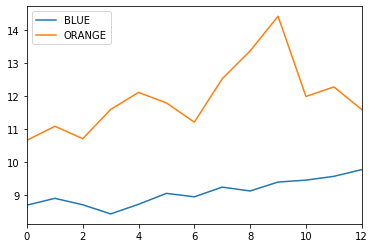

In [10]:
prices.plot()

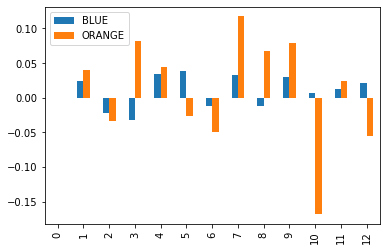

In [12]:
returns.plot.bar()

In [13]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [14]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

### Compound the returns

Even though the **arithmetic mean** return is 0.01 for both series, the total return is lower for the more volatile series:

In [18]:
np.prod(returns + 1) - 1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

### Annualizing a monthly 1% return

In [19]:
(1 + 0.01) ** 12 - 1

0.12682503013196977

### Annualizing a daily 0.1% return

(there are roughly 252 trading days in a year)

In [21]:
(1 + 0.001) ** 252 - 1

0.28643404437615216

# Risk

Volatility: Standard deviation and variance